In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
# dataset1 = pd.read_csv('data1.csv')

In [6]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [7]:
worksheet = gc.open('MyMLData').sheet1
data = worksheet.get_all_values()

In [8]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'Input':'float'})
dataset1 = dataset1.astype({'Output':'float'})

In [9]:
dataset1.head()

,Input,Output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [10]:
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [11]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [13]:
Scaler = MinMaxScaler()

In [14]:
Scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train1 = Scaler.transform(X_train)

In [16]:
#Create the model
ai=Sequential([
    Dense(7,activation='relu'),
    Dense(14,activation='relu'),
    Dense(1)
])

In [17]:
#Compile the model
ai.compile(optimizer='rmsprop',loss='mse')

In [18]:
# fit the model
ai.fit(X_train1,y_train,epochs=2000)
ai.fit(X_train1,y_train,epochs=2000)

Streaming output truncated to the last 5000 lines.
Epoch 510/2000
1/1 [==============================] - 0s 9ms/step - loss: 11830.6074
Epoch 511/2000
1/1 [==============================] - 0s 11ms/step - loss: 11826.3584
Epoch 512/2000
1/1 [==============================] - 0s 7ms/step - loss: 11822.1006
Epoch 513/2000
1/1 [==============================] - 0s 10ms/step - loss: 11817.8330
Epoch 514/2000
1/1 [==============================] - 0s 11ms/step - loss: 11813.5566
Epoch 515/2000
1/1 [==============================] - 0s 9ms/step - loss: 11809.2705
Epoch 516/2000
1/1 [==============================] - 0s 10ms/step - loss: 11804.9746
Epoch 517/2000
1/1 [==============================] - 0s 11ms/step - loss: 11800.6719
Epoch 518/2000
1/1 [==============================] - 0s 9ms/step - loss: 11796.3594
Epoch 519/2000
1/1 [==============================] - 0s 9ms/step - loss: 11792.0381
Epoch 520/2000
1/1 [==============================] - 0s 7ms/step - loss: 11787.7080
Epoch 521

In [20]:
loss_df = pd.DataFrame(ai.history.history)

<Axes: >

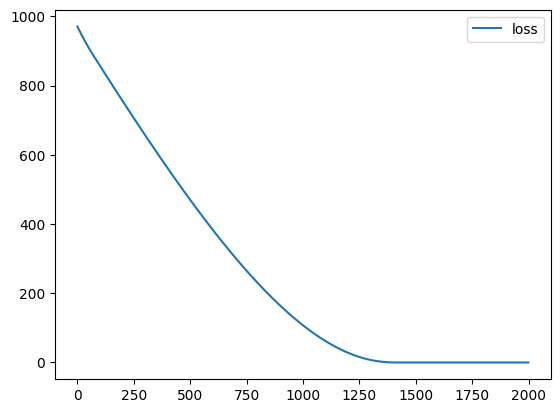

In [21]:
loss_df.plot()

In [22]:
X_test1 = Scaler.transform(X_test)

In [23]:
ai.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 136ms/step - loss: 0.0077


0.00768748065456748

In [24]:
X_n1 = [[30]]

In [25]:
X_n1_1 = Scaler.transform(X_n1)

In [26]:
ai.predict(X_n1_1)

1/1 [==============================] - 0s 106ms/step


array([[301.11816]], dtype=float32)